# Task 5 : Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


**US-accident Analysis(2016-23)**

#### Assigning the csv file path as Download_URL

In [3]:
Download_URL = "/kaggle/input/us-accidents/US_Accidents_March23.csv"

#### Reading the csv file using pandas

In [4]:
df = pd.read_csv(Download_URL)

In [5]:
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


**Data Preparation and Cleaning**

In [6]:
df.shape

(7728394, 46)

In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [10]:
#To find number of  total numeric columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_col = df.select_dtypes(include =numerics )
len(numeric_col.columns)

13

In [11]:
#Checking which all columns have missing values by which amount (in sort way)

df.isna().sum().sort_values(ascending = False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [12]:
#Checking missing value percentages in all columns (in sort way)

missing_percentages = df.isna().sum().sort_values(ascending = False)/len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [13]:
missing_percentages[missing_percentages != 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

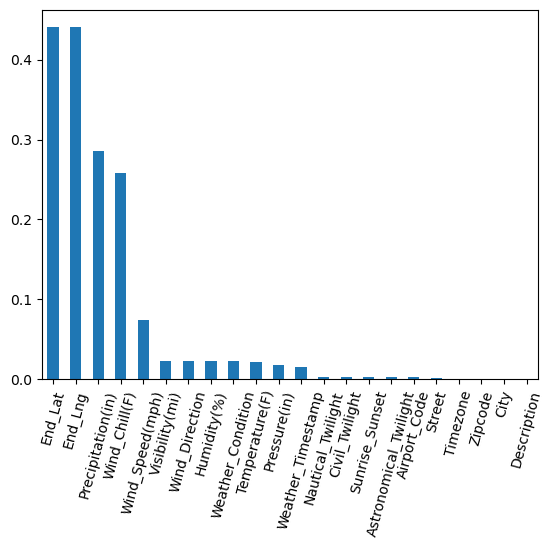

In [14]:
missing_percentages[missing_percentages != 0].plot(kind = "bar");
plt.xticks(rotation=75);     #To rotate the Xlabel

# EDA

Considering columns that seems to affect the road accidents more directly 
1. City
2. Start time
3. Start Lat and Long
4. Temperature
5. Weather Condition

#### ***1. Citywise Accidents in USA***

##### Total no. of Cities in USA

In [15]:
cities = df.City.unique()
len(cities)

13679

In [16]:
#Showing no. of accidents in dfferent cities

cities_by_accidents = df.City.value_counts().sort_values(ascending = False)
cities_by_accidents

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Bon Secour                           1
Sidney Center                        1
Fluker                               1
Mapleville                           1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

> Miami, Houston, Los Angeles, Charlotte, Dallas are some of the cities with highest no. of accidents reccorded.

**Showing Top 50 cities with highest no. of accidents**

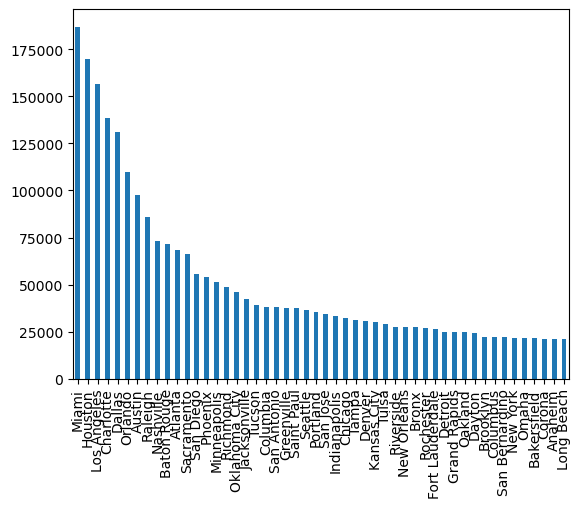

<Figure size 2800x60000 with 0 Axes>

In [17]:
cities_by_accidents[:50].plot(kind = 'bar');
plt.figure(figsize =(28,600));

/tmp/ipykernel_32/2270598693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accidents);


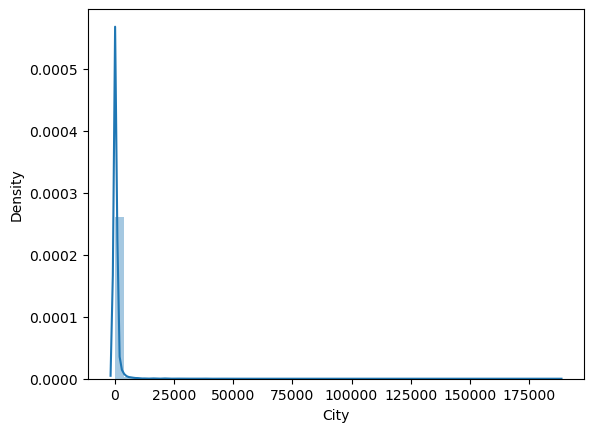

In [20]:
sns.distplot(cities_by_accidents);

In [21]:
high_accident_cities = cities_by_accidents[cities_by_accidents >=1000];
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000];

In [23]:
print("No. of cities with high accidents are {}".format(len(high_accident_cities)))
print("Percentage of cities with high accidents are {}".format((len(high_accident_cities)/len(cities))*100))
print("No. of cities with low accidents are {}".format(len(low_accident_cities)))
print("Percentage of cities with low accidents are {}".format((len(low_accident_cities)/len(cities))*100))

No. of cities with high accidents are 1218
Percentage of cities with high accidents are 8.904159660793917
No. of cities with low accidents are 12460
Percentage of cities with low accidents are 91.0885298632941


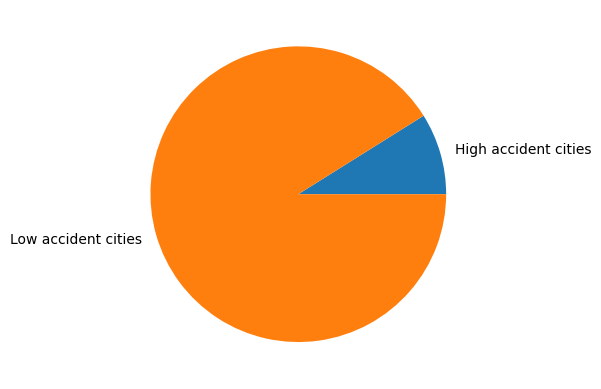

In [24]:
High_accident_zone = (len(high_accident_cities)/len(cities))*100
Low_accident_zone = (len(low_accident_cities)/len(cities))*100
y = np.array([High_accident_zone,Low_accident_zone])
mylabels = np.array(["High accident cities", "Low accident cities"])
plt.pie(y, labels = mylabels);
plt.show()


Percentage of cities with high accidents are 8.904159660793917
Percentage of cities with low accidents are 91.0885298632941

Here,High accidents means no.of accidents more than 1000 in the 7 years and Low accidents means no.of accidents less than 1000 in the 7 years(2016-2023).

#### ***2. Time and Day Factor in Accidents***

In [25]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [26]:
# To get the hour of day (in 24hr clock system) in which accident took place 

df.Start_Time.dt.hour

0           5
1           6
2           6
3           7
4           7
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    18
Name: Start_Time, Length: 7728394, dtype: int64

Text(0, 0.5, 'No. of Accidents')

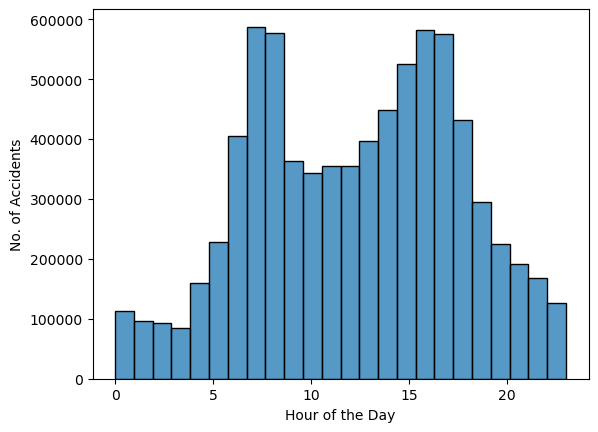

In [27]:
# A plot to show no. of accidents that took place in a specific time of 24 hrs clock.

sns.histplot(df.Start_Time.dt.hour, bins=24);
import matplotlib.pyplot as plt
plt.xlabel("Hour of the Day")
plt.ylabel("No. of Accidents")

Max no of accidents are in the morning (6am -8am) and in evening (3pm -6pm). May be because it is the peak hour of the day as most people go out and return home from work place in this time only.

Text(0, 0.5, 'No. of Accidents')

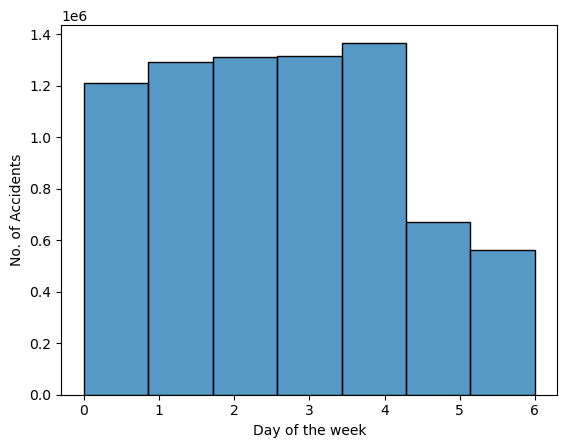

In [28]:
# A plot to show no. of accidents that took place in a specific day of a week.

sns.histplot(df.Start_Time.dt.dayofweek, bins=7);
import matplotlib.pyplot as plt
plt.xlabel("Day of the week")
plt.ylabel("No. of Accidents")

Weekends have less accidents alsmost half of the average weekdays accidents.

Text(0, 0.5, 'No. of Accidents')

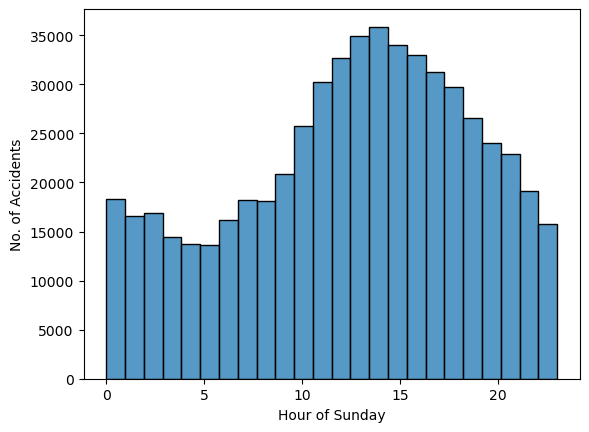

In [29]:
#Viewing hourly distribution for sunday
import matplotlib.pyplot as plt
For_sunday = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
Sunday_distribution = sns.histplot(For_sunday.dt.hour, bins = 24)
plt.xlabel("Hour of Sunday")
plt.ylabel("No. of Accidents")

Clearly no. of accidents in sunday is more between the time 11am to 6pm. Maybe people start their day late during on sunday.

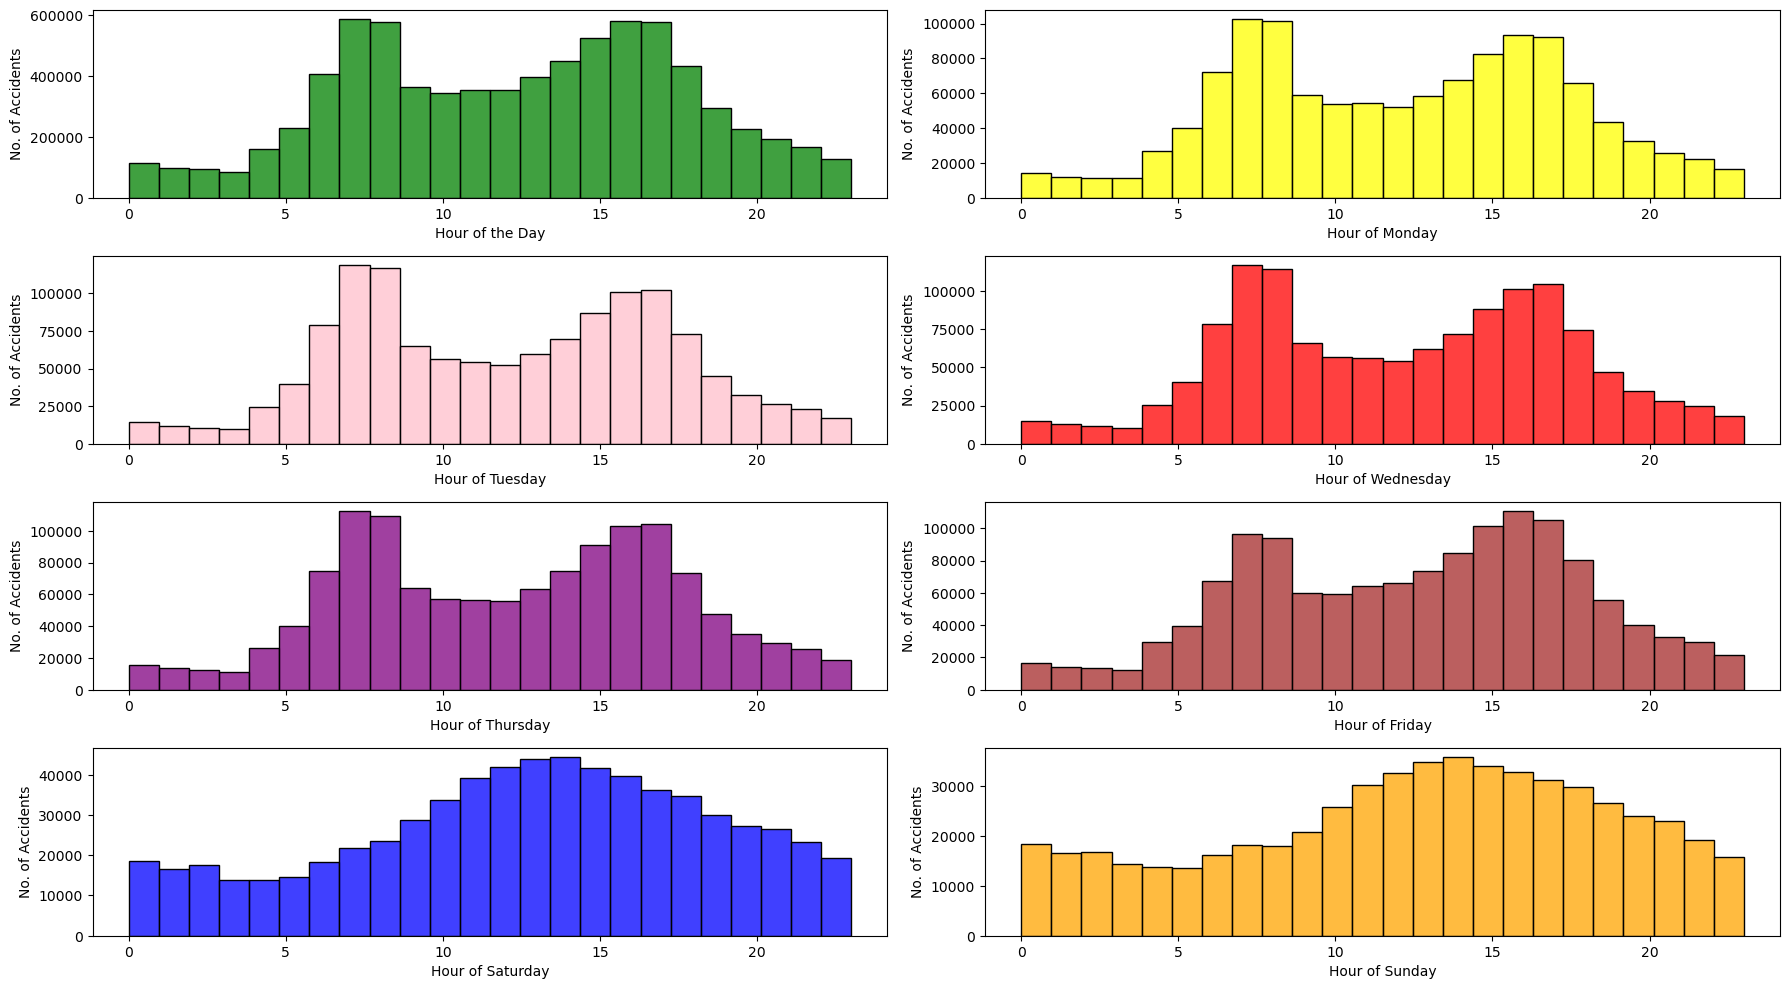

In [30]:
# Viewing the distribution of hourly Accidents for each day of week separately.

fig,axes = plt.subplots(4, 2, figsize=(18, 10))
import matplotlib.pyplot as plt

#For all days (Overall) Hourly accident distribution
sns.histplot(df.Start_Time.dt.hour, bins=24, ax=axes[0,0], color = "Green");
axes[0,0].set_xlabel("Hour of the Day")
axes[0,0].set_ylabel("No. of Accidents")

#For Monday Hourly accident distribution

For_Monday = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
Monday_distribution = sns.histplot(For_Monday.dt.hour, bins = 24, ax = axes[0,1], color = "Yellow")
axes[0,1].set_xlabel("Hour of Monday")
axes[0,1].set_ylabel("No. of Accidents")


#For Tuesday Hourly accident distribution

For_Tuesday = df.Start_Time[df.Start_Time.dt.dayofweek == 1]
Tuesday_distribution = sns.histplot(For_Tuesday.dt.hour, bins = 24, ax = axes[1,0],  color = "Pink")
axes[1,0].set_xlabel("Hour of Tuesday")
axes[1,0].set_ylabel("No. of Accidents")

#For Wednesday Hourly accident distribution

For_Wednesday = df.Start_Time[df.Start_Time.dt.dayofweek == 2]
Wednesday_distribution = sns.histplot(For_Wednesday.dt.hour, bins = 24, ax = axes[1,1],  color = "Red")
axes[1,1].set_xlabel("Hour of Wednesday")
axes[1,1].set_ylabel("No. of Accidents")

#For Thursday Hourly accident distribution

For_Thursday = df.Start_Time[df.Start_Time.dt.dayofweek == 3]
Thursday_distribution = sns.histplot(For_Thursday.dt.hour, bins = 24, ax = axes[2,0],  color = "Purple")
axes[2,0].set_xlabel("Hour of Thursday")
axes[2,0].set_ylabel("No. of Accidents")

#For Friday Hourly accident distribution

For_Friday = df.Start_Time[df.Start_Time.dt.dayofweek == 4]
Friday_distribution = sns.histplot(For_Friday.dt.hour, bins = 24, ax = axes[2,1],  color = "Brown")
axes[2,1].set_xlabel("Hour of Friday")
axes[2,1].set_ylabel("No. of Accidents")

#For Saturday Hourly accident distribution

For_saturday = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
Saturday_distribution = sns.histplot(For_saturday.dt.hour, bins = 24, ax = axes[3,0],  color = "Blue")
axes[3,0].set_xlabel("Hour of Saturday")
axes[3,0].set_ylabel("No. of Accidents")

#For Sunday Hourly accident distribution

For_Sunday = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
Sunday_distribution = sns.histplot(For_Sunday.dt.hour, bins = 24, ax = axes[3,1], color = "Orange")
axes[3,1].set_xlabel("Hour of Sunday")
axes[3,1].set_ylabel("No. of Accidents")


plt.tight_layout()

Observation : Weekdays and Weekends have different distribution of accidents. In weekdays peak is in genarlly Morning and Evening while in Weekends peak seems to be in afternoon.

#### ***3. Weather condition factor for Accidents***

In [31]:
df['Weather_Condition'].value_counts()      #Total accidents given corresponding to each weather condition

Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: Weather_Condition, Length: 144, dtype: int64

##### Selecting only top 15 weather conditions which accounted for maximum accidents

In [32]:
weather = df['Weather_Condition'].value_counts().sort_values(ascending = False).head(15)     
weather

Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Rain                  84331
Haze                  76223
Fair / Windy          35671
Heavy Rain            32309
Light Drizzle         22684
Name: Weather_Condition, dtype: int64

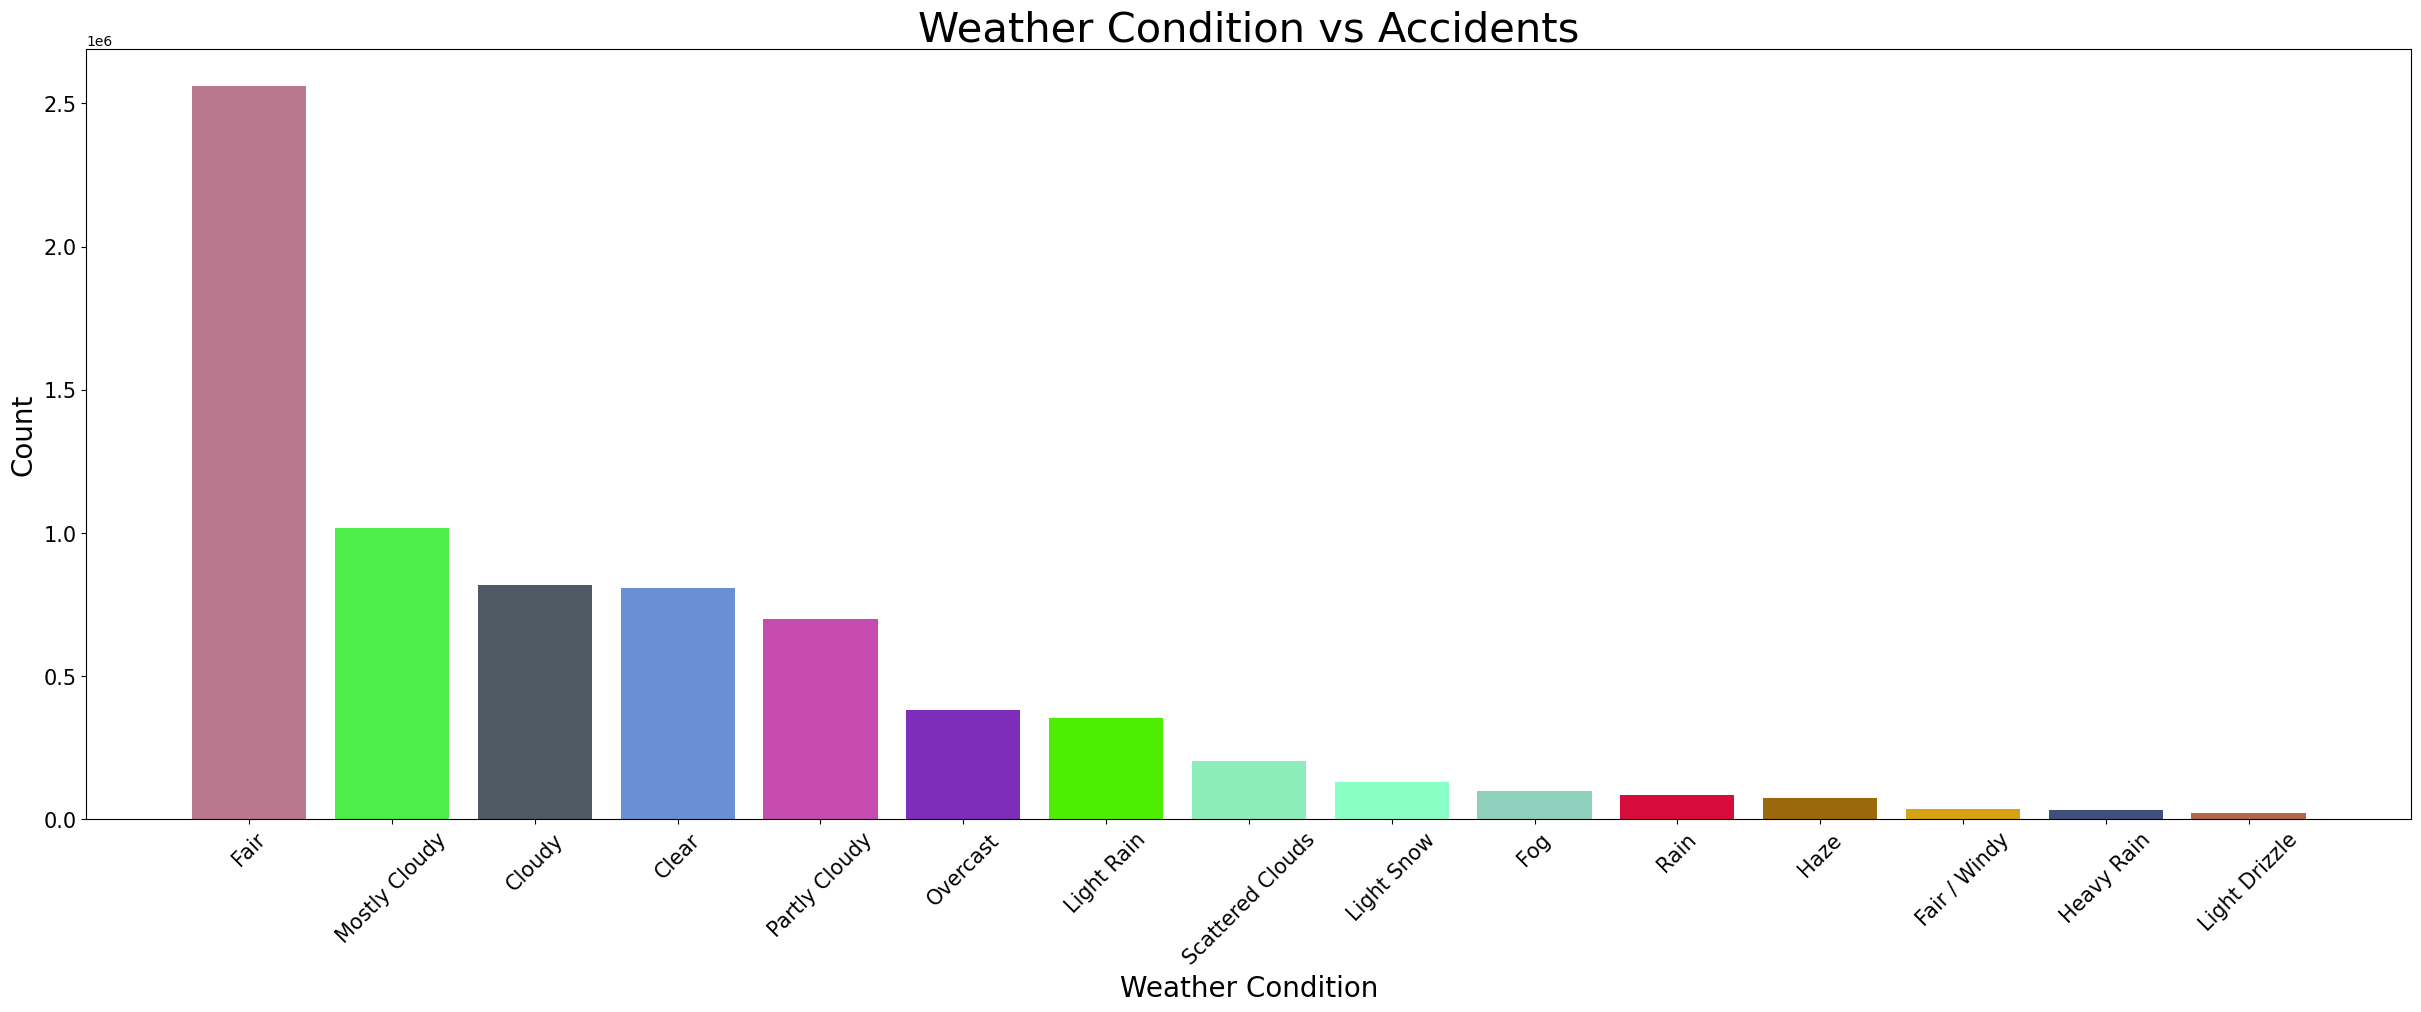

In [33]:
import random
figsize = (30, 10) 

Accident_Counts = weather.values
Weather_Conditions = weather.index
def generate_random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

bar_colors = [generate_random_color() for _ in range(len(Weather_Conditions))]

plt.figure(figsize=figsize)

plt.bar(Weather_Conditions, Accident_Counts, color=bar_colors)
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Weather Condition", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Weather Condition vs Accidents", fontsize = 30)

plt.show()


Most of the accidents have taken place in Fair, cloudy and clear day.
Very less accident on rainy, foggy days. Probably because people travel more in clear, fair days and travel less in rainy days.

#### ***4. Temperature Factor in Accidents***

**Seeing no. of accidents corresponding to particular temperature**

In [34]:
df1 = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")

In [35]:
df["Temperature(F)"] = df1["Temperature(F)"]
df["Temperature(F)"]

0          36.9
1          37.9
2          36.0
3          35.1
4          36.0
           ... 
7728389    86.0
7728390    70.0
7728391    73.0
7728392    71.0
7728393    79.0
Name: Temperature(F), Length: 7728394, dtype: float64

**For Simplicity, I have converted the Fahrenheit into Celcius**

In [36]:
df_temp = (df["Temperature(F)"] -32)*5/9
a = df_temp.value_counts().sort_values(ascending=False)
a

 25.000000    170991
 22.777778    170898
 20.000000    163767
 22.222222    160498
 23.888889    158448
               ...  
-30.722222         1
-27.722222         1
 76.000000         1
-24.500000         1
 55.888889         1
Name: Temperature(F), Length: 860, dtype: int64

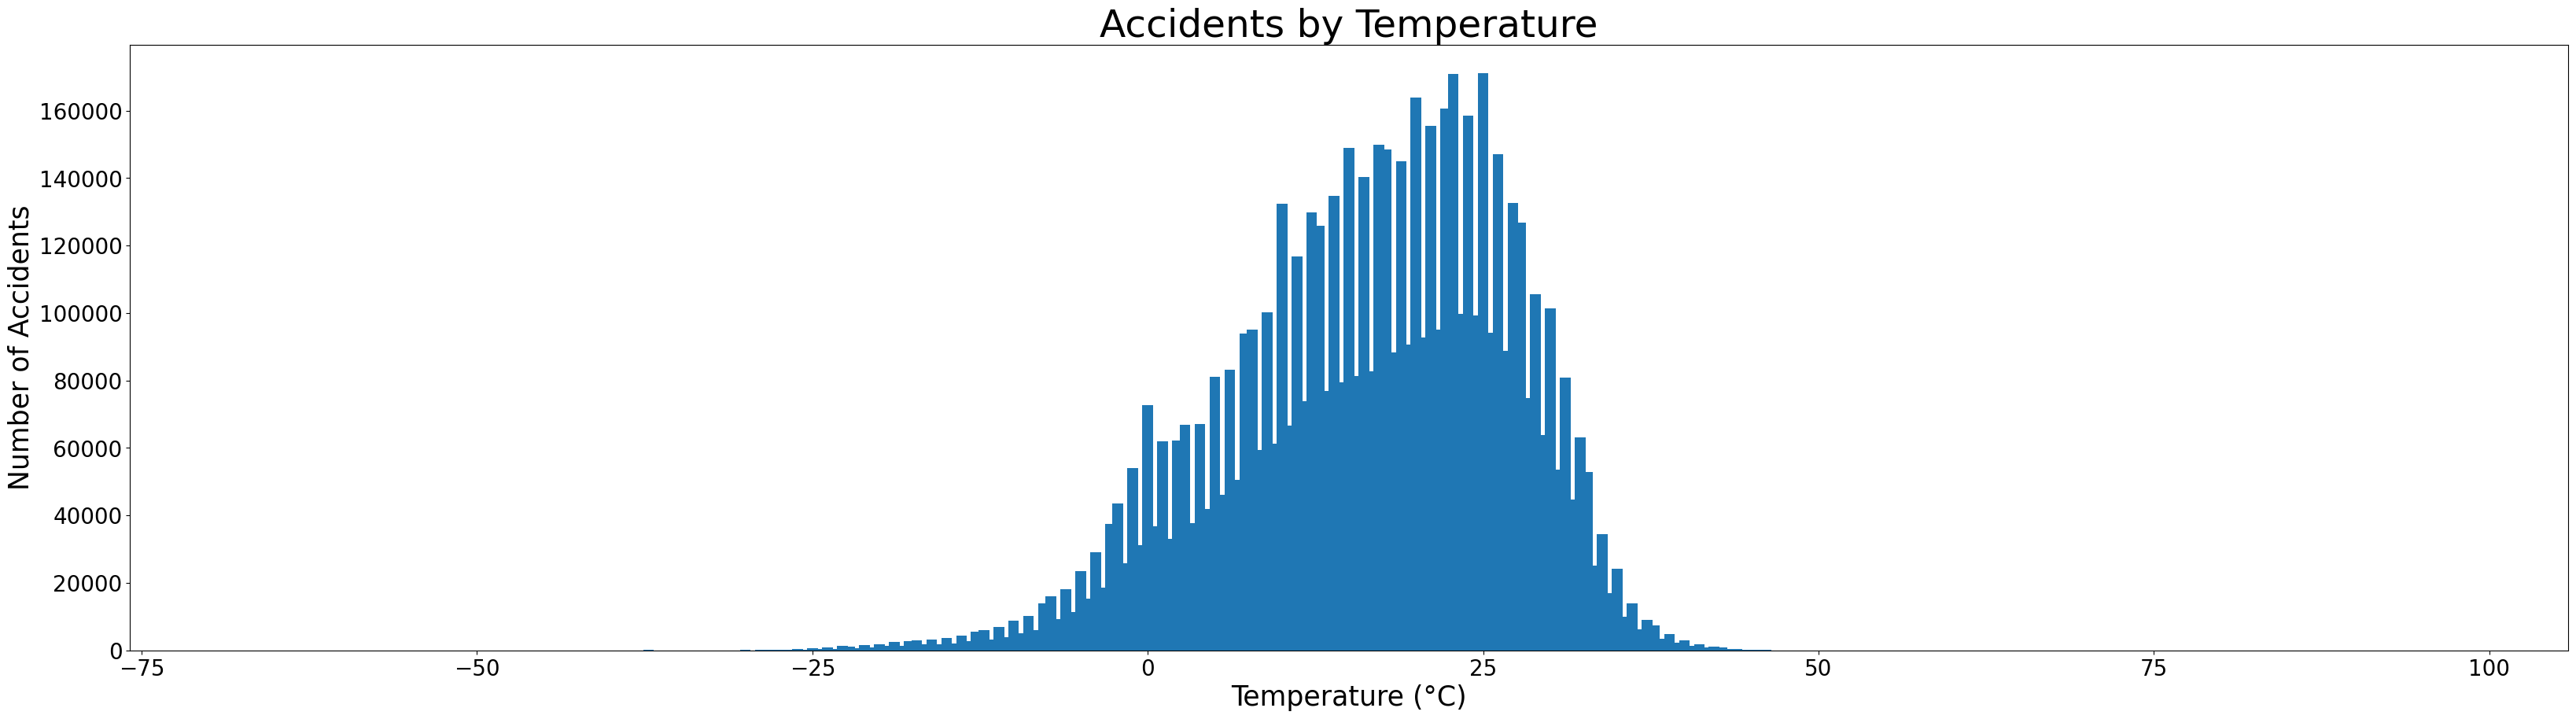

In [37]:
figsize = (40, 10)

temp_list = a.index
accident_list = a.values
plt.figure(figsize=figsize)

plt.bar(temp_list, accident_list)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Temperature (°C)", fontsize = 25)
plt.ylabel("Number of Accidents",fontsize = 25)
plt.title("Accidents by Temperature", fontsize = 35)

plt.show()


Majority of the accidents have taken place between 10 degree to 30 degree celcius temperature.

#### **5. Longitude and Latitude with Accidents Density**

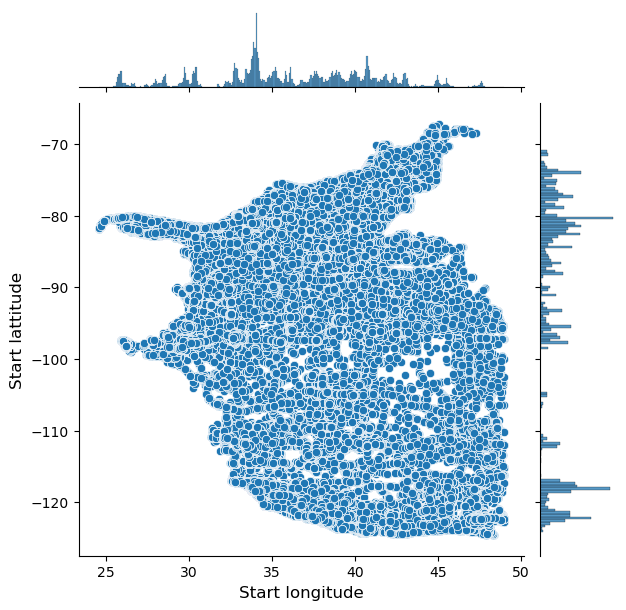

In [40]:
df_num=df.select_dtypes(np.number)
sns.jointplot(x=df_num.Start_Lat.values , y=df_num.Start_Lng.values,height=6)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start longitude', fontsize=12)
plt.show()

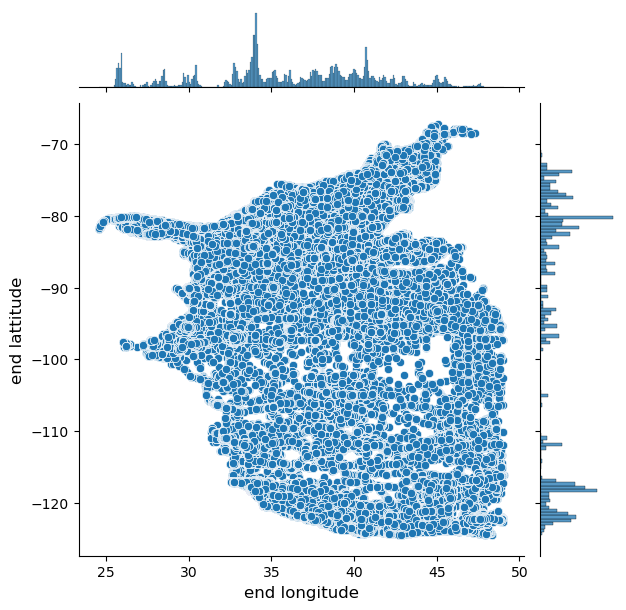

In [39]:
sns.jointplot(x=df_num.End_Lat.values , y=df_num.End_Lng.values,height=6)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()

## **Summary and Conclusion**

* New York city is not present in the dataset.
* Miami, Houston, Los Angeles, Charlotte, Dallas are some of the cities with highest no. of accidents reccorded.
* No. of cities with high accidents are 1218, ie only 8.9%
* No. of cities with low accidents are 12460 ie only 91.1%
* Max no of accidents are in the morning (6am -8am) and in evening (3pm -6pm).May be because it is the peak hour of the day as most people go out and return home from work place in this time only.
* Weekends have less accidents alsmost half of the average weekdays accidents.
* Clearly no. of accidents in sunday is more between the time 11am to 6pm. Maybe people start their day late during on sunday
* Weekdays and Weekends have different distribution of accidents. In weekdays peak is in genarlly Morning and Evening while in Weekends peak seems to be in afternoon.
* Most of the accidents have taken place in Fair, cloudy and clear day. Very less accident on rainy, foggy days. Probably because people travel more in clear, fair days and travel less in rainy days.
* Majority of the accidents have taken place between 10 degree to 30 degree celcius temperature.


